In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:\\6 семестр\\эконометрика\\ideal.csv", sep=";", decimal=",")
    
data.head()

,Year,EmployedPopulation,RealWage,Vacancies,GDPGrowth,Export,RealEmployed,CPI,Wage,RealWageAbsolut,Gdp,RealGdp,Education,Inv,Unemp
0,2000,5843,112.0,8500,105.8,119.4,4444,207.5,5.891,3.00,913.4,465.7,22.1,0.9,95.8
1,2001,5873,129.6,8300,104.7,111.1,4422,146.1,12.302,8.91,1717.3,1243.2,22.5,0.8,102.9
2,2002,5903,107.9,7000,105.0,109.8,4387,134.8,18.923,14.86,2613.8,2051.1,23.0,1.7,130.5
3,2003,5928,103.2,6800,107.0,126.5,4347,125.4,25.068,21.14,3656.5,3085.4,23.4,1.0,136.1
4,2004,5937,117.4,11000,111.4,137.6,4326,114.4,34.751,32.14,4999.2,4621.3,23.8,0.7,83.0


In [2]:
skewness = data[["EmployedPopulation", "GDPGrowth", "RealWageAbsolut", "Vacancies", "Export"]].skew()
kurtosis = data[["EmployedPopulation", "GDPGrowth", "RealWageAbsolut", "Vacancies", "Export"]].kurtosis()

In [3]:
print("Skewness (Ассиметрия):")
print(skewness)
print("\nKurtosis (Эксцесс):")
print(kurtosis)
print("\n")

Skewness (Ассиметрия):
EmployedPopulation   -0.132325
GDPGrowth            -0.099242
RealWageAbsolut       1.011006
Vacancies             0.509855
Export               -0.069408
dtype: float64

Kurtosis (Эксцесс):
EmployedPopulation   -1.840426
GDPGrowth            -0.668415
RealWageAbsolut      -0.037316
Vacancies            -0.665925
Export                0.101840
dtype: float64




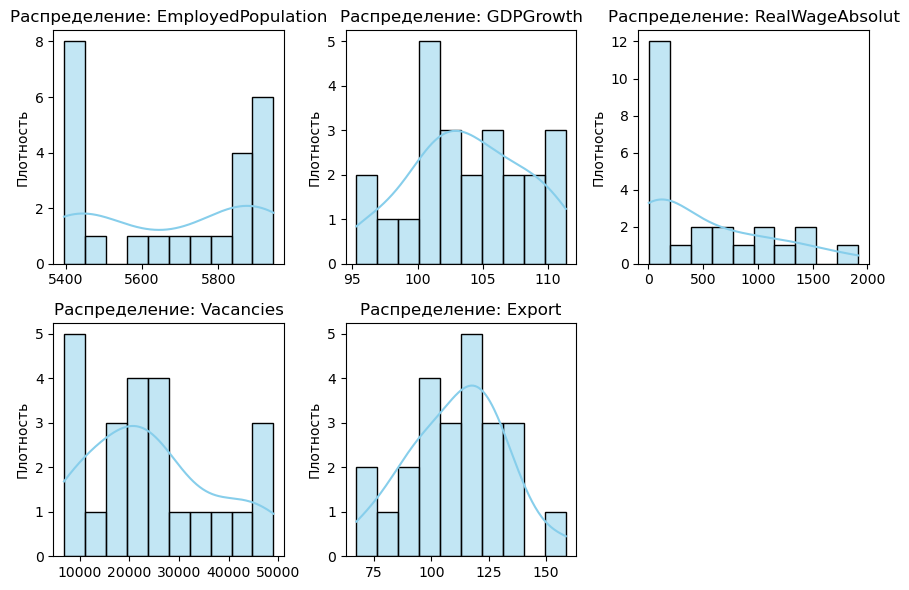

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))

variables = [
    "EmployedPopulation", 
    "GDPGrowth", 
    "RealWageAbsolut", 
    "Vacancies", 
    "Export"
]

for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[var], kde=True, bins=10, color="skyblue")
    plt.title(f"Распределение: {var}")
    plt.xlabel("")
    plt.ylabel("Плотность")

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from scipy.stats import shapiro, jarque_bera

# Список переменных
variables = ["EmployedPopulation", "GDPGrowth", "RealWageAbsolut", "Vacancies", "Export"]

# Словари для хранения результатов
shapiro_results = {}
jb_results = {}

# Проведение тестов
for var in variables:
    shapiro_stat, shapiro_p = shapiro(data[var])
    jb_stat, jb_p = jarque_bera(data[var])
    
    shapiro_results[var] = {
        "Shapiro-Wilk Statistic": shapiro_stat,
        "p-value": shapiro_p
    }
    
    jb_results[var] = {
        "Jarque-Bera Statistic": jb_stat,
        "p-value": jb_p
    }

# Вывод результатов
print("=== Тест Шапиро–Уилка ===")
for var, result in shapiro_results.items():
    print(f"{var}: statistic = {result['Shapiro-Wilk Statistic']:.4f}, p-value = {result['p-value']:.4f}")

print("\n=== Тест Жака-Бера ===")
for var, result in jb_results.items():
    print(f"{var}: statistic = {result['Jarque-Bera Statistic']:.4f}, p-value = {result['p-value']:.4f}")


=== Тест Шапиро–Уилка ===
EmployedPopulation: statistic = 0.8309, p-value = 0.0010
GDPGrowth: statistic = 0.9757, p-value = 0.8062
RealWageAbsolut: statistic = 0.8334, p-value = 0.0011
Vacancies: statistic = 0.9349, p-value = 0.1252
Export: statistic = 0.9869, p-value = 0.9831

=== Тест Жака-Бера ===
EmployedPopulation: statistic = 3.0155, p-value = 0.2214
GDPGrowth: statistic = 0.6384, p-value = 0.7267
RealWageAbsolut: statistic = 3.6578, p-value = 0.1606
Vacancies: statistic = 1.5124, p-value = 0.4694
Export: statistic = 0.0419, p-value = 0.9793


In [6]:
data["RealWageAbsolut"] = np.log(data["RealWageAbsolut"])
data["EmployedPopulation"] = np.log(data["EmployedPopulation"])

In [7]:
from scipy.stats import shapiro, jarque_bera
import numpy as np

# Тест Шапиро–Уилка
shapiro_log_emp = shapiro(data["EmployedPopulation"])
shapiro_log_wage = shapiro(data["RealWageAbsolut"])

print("=== Тест Шапиро–Уилка ===")
print(f"log(EmployedPopulation): statistic = {shapiro_log_emp.statistic:.4f}, p-value = {shapiro_log_emp.pvalue:.4f}")
print(f"log(RealWageAbsolut): statistic = {shapiro_log_wage.statistic:.4f}, p-value = {shapiro_log_wage.pvalue:.4f}")

# Тест Жака-Бера
jb_log_emp = jarque_bera(data["EmployedPopulation"])
jb_log_wage = jarque_bera(data["RealWageAbsolut"])

print("\n=== Тест Жака-Бера ===")
print(f"log(EmployedPopulation): statistic = {jb_log_emp.statistic:.4f}, p-value = {jb_log_emp.pvalue:.4f}")
print(f"log(RealWageAbsolut): statistic = {jb_log_wage.statistic:.4f}, p-value = {jb_log_wage.pvalue:.4f}")


=== Тест Шапиро–Уилка ===
log(EmployedPopulation): statistic = 0.8297, p-value = 0.0009
log(RealWageAbsolut): statistic = 0.9315, p-value = 0.1056

=== Тест Жака-Бера ===
log(EmployedPopulation): statistic = 3.0261, p-value = 0.2202
log(RealWageAbsolut): statistic = 1.5675, p-value = 0.4567


In [8]:
def plot_histogram_with_outliers(df, column, title):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_multiplier = 1.5  # Используем более строгий критерий
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    plt.figure(figsize=(8, 6))
    hist = sns.histplot(df[column], kde=True, color='blue', label='Data', bins=20, stat='count')
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    print(f"Outliers for {column}: {outliers.tolist()}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    
    # Вычисляем высоту для точек выбросов (20% от максимальной высоты гистограммы)
    max_height = max([h.get_height() for h in hist.patches if h.get_height() > 0])
    outlier_height = max_height * 0.2
    
    # Добавление точек для выбросов
    if not outliers.empty:
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_values = df.loc[outlier_indices, column]
        plt.scatter(outlier_values, [outlier_height] * len(outlier_values), color='red', label='Outliers', s=100, marker='o')
        for x in outlier_values:
            plt.text(x, outlier_height + 0.1 * max_height, f'{x}', ha='center', va='bottom', color='red', fontsize=8)
    
    plt.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2f}')
    
    plt.title(title)
    plt.legend()
    plt.show()
    plt.close()

Outliers for EmployedPopulation: []
Lower bound: 8.48, Upper bound: 8.80


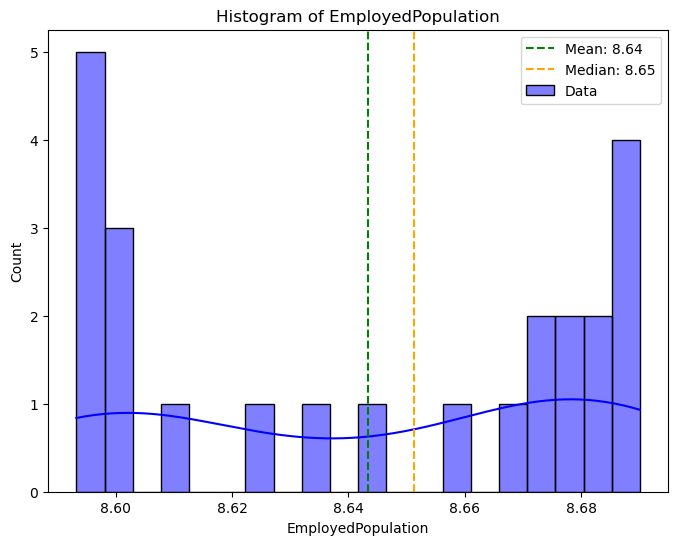

Outliers for RealWageAbsolut: []
Lower bound: -0.15, Upper bound: 10.91


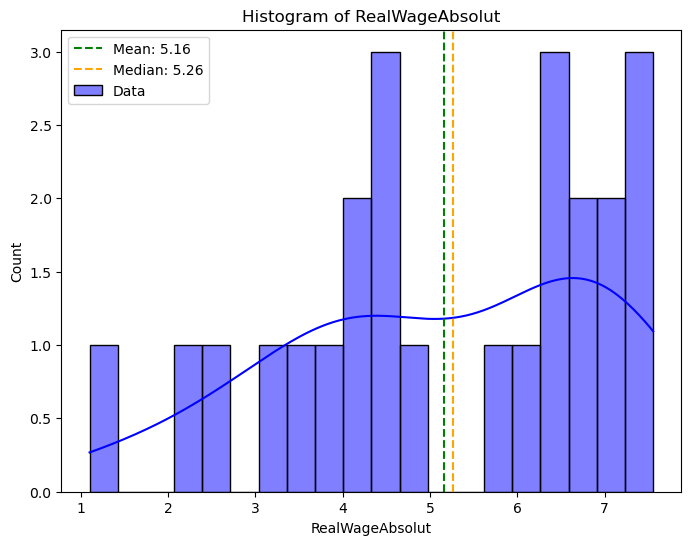

Outliers for GDPGrowth: []
Lower bound: 92.49, Upper bound: 115.99


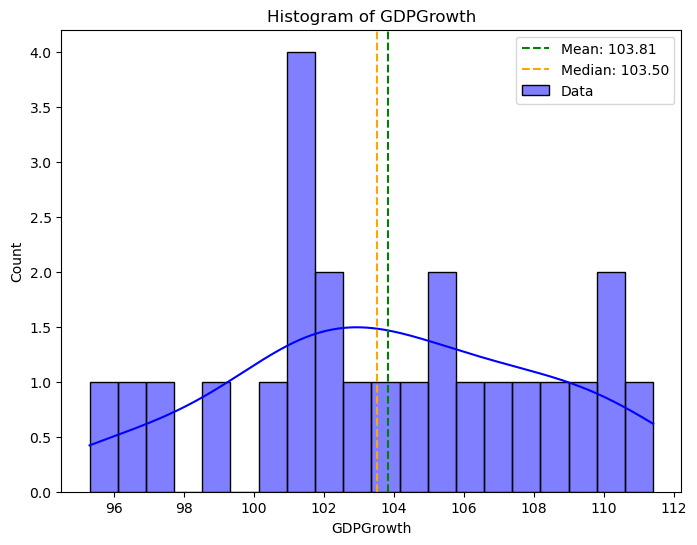

Outliers for Vacancies: []
Lower bound: -7625.00, Upper bound: 53375.00


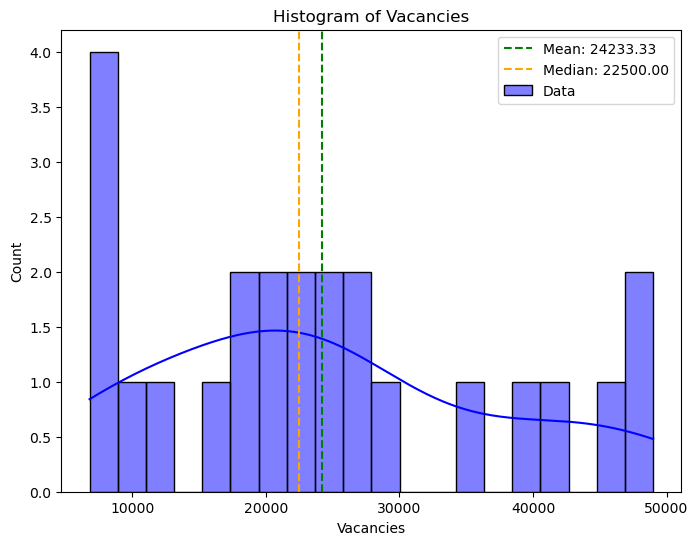

Outliers for Export: []
Lower bound: 58.77, Upper bound: 162.18


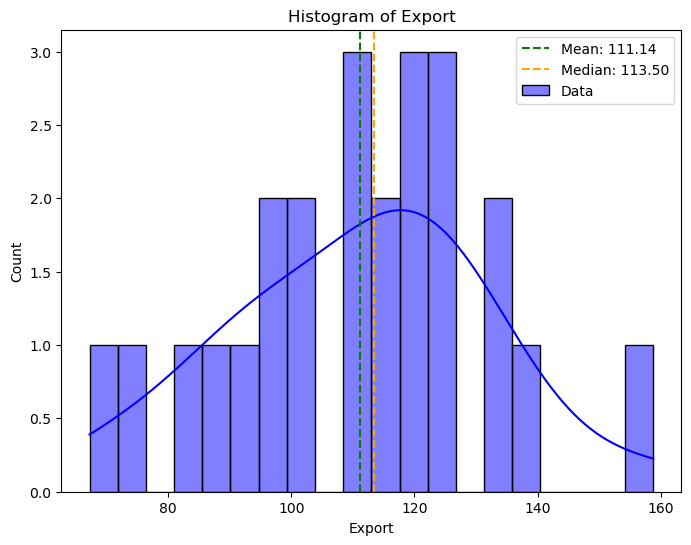

In [9]:
plot_histogram_with_outliers(data, "EmployedPopulation", "Histogram of EmployedPopulation")
plot_histogram_with_outliers(data, "RealWageAbsolut", "Histogram of RealWageAbsolut")
plot_histogram_with_outliers(data, "GDPGrowth", "Histogram of GDPGrowth")
plot_histogram_with_outliers(data, "Vacancies", "Histogram of Vacancies")
plot_histogram_with_outliers(data, "Export", "Histogram of Export")

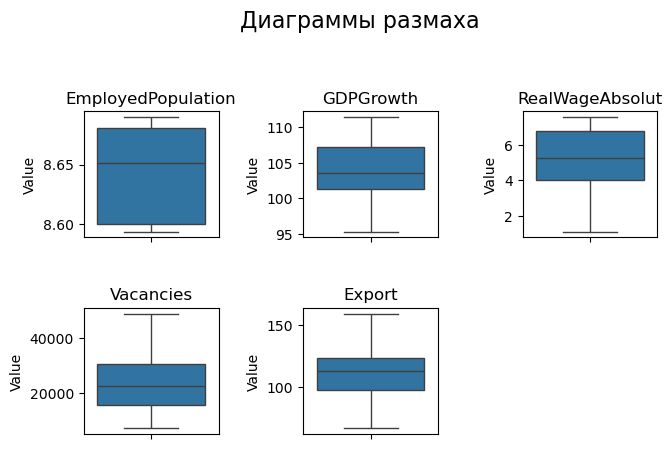

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
fig.suptitle("Диаграммы размаха", fontsize=16)
plt.tight_layout(pad=3.0)

# Убираем последний пустой subplot
fig.delaxes(axes[1, 2])

# Список переменных для анализа
variables = ["EmployedPopulation", "GDPGrowth", "RealWageAbsolut", "Vacancies", "Export"]

# Создаем boxplot для каждой переменной
for ax, var in zip(axes.flat, variables):
    sns.boxplot(data=data[var], ax=ax)
    ax.set_title(var)
    ax.set_ylabel("Value")
    
plt.show()

In [11]:
target = 'EmployedPopulation'
factors = ['GDPGrowth', 'RealWageAbsolut', 'Vacancies', 'Export']

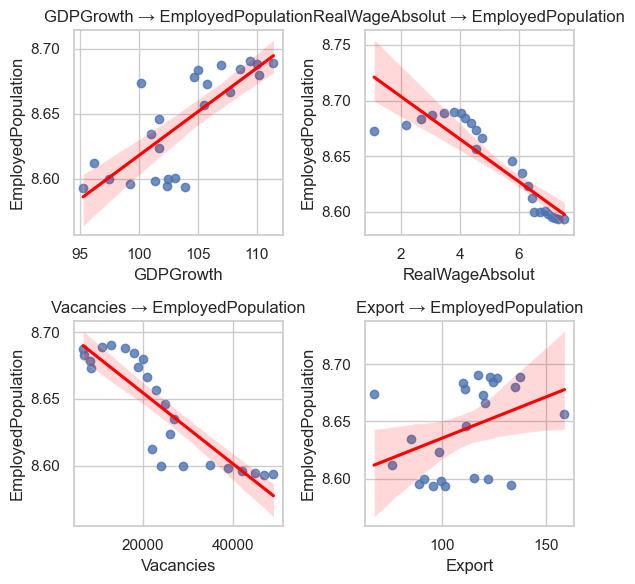

In [12]:
sns.set(style="whitegrid")

cols = 2
rows = 2 

fig, axes = plt.subplots(rows, cols, figsize=(6, 3 * rows))

for i, factor in enumerate(factors):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    
    sns.regplot(x=data[factor], y=data[target], ax=ax, line_kws={"color": "red"})
    ax.set_title(f"{factor} → {target}")
    ax.set_xlabel(factor)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

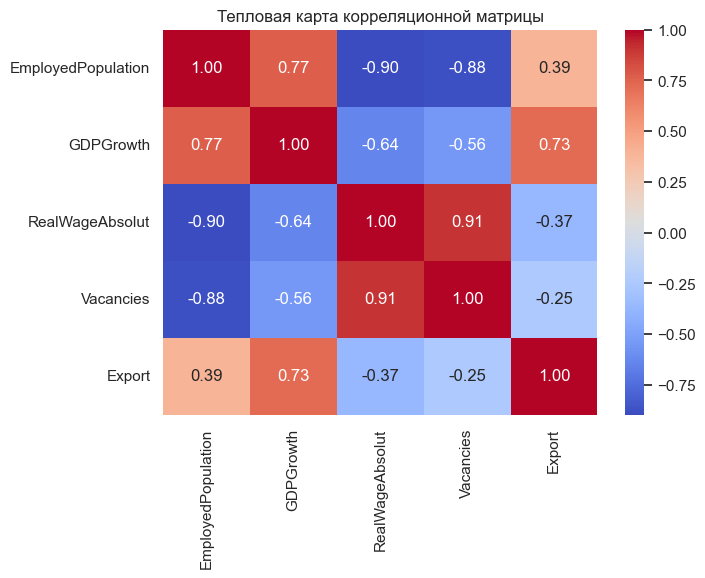

In [13]:
corr_matrix = data[[target] + factors].corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

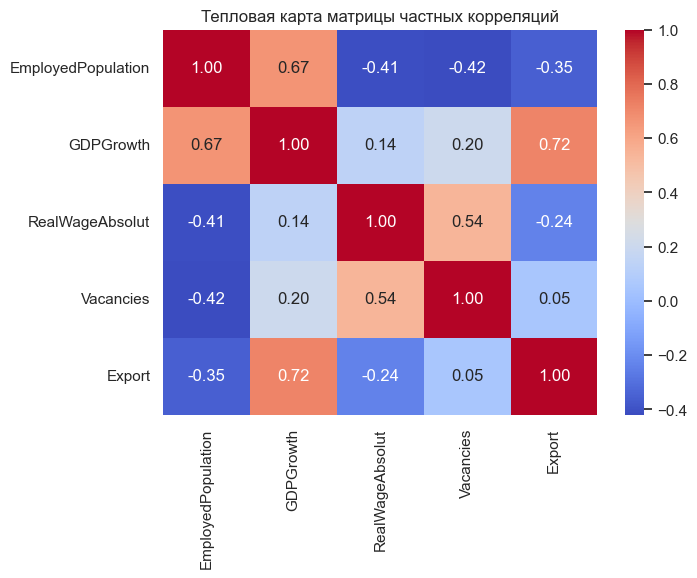

In [14]:
import pingouin as pg

variables = [target] + factors

# Инициализируем пустую матрицу для хранения частных корреляций
partial_corr_matrix = pd.DataFrame(index=variables, columns=variables)

# Заполняем матрицу частными корреляциями
for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            partial_corr_matrix.loc[var1, var2] = 1.0  # Корреляция переменной с самой собой = 1
        else:
            # Определяем остальные переменные для контроля (все, кроме var1 и var2)
            control_vars = [v for v in variables if v not in [var1, var2]]
            # Вычисляем частную корреляцию между var1 и var2, контролируя остальные переменные
            pcorr = pg.partial_corr(data=data, x=var1, y=var2, covar=control_vars)
            partial_corr_matrix.loc[var1, var2] = pcorr['r'].iloc[0]

# Преобразуем значения в матрице в числовой формат
partial_corr_matrix = partial_corr_matrix.astype(float)

# Создаем тепловую карту для матрицы частных корреляций
plt.figure(figsize=(7, 5))
sns.heatmap(partial_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта матрицы частных корреляций")
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = data[['GDPGrowth', 'RealWageAbsolut', 'Export']]  # или другие предикторы

X = sm.add_constant(X)  # добавляем константу для корректного расчёта VIF

# Расчёт VIF для каждого предиктора
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Variable          VIF
0            const  1595.176797
1        GDPGrowth     3.172451
2  RealWageAbsolut     1.741795
3           Export     2.177649


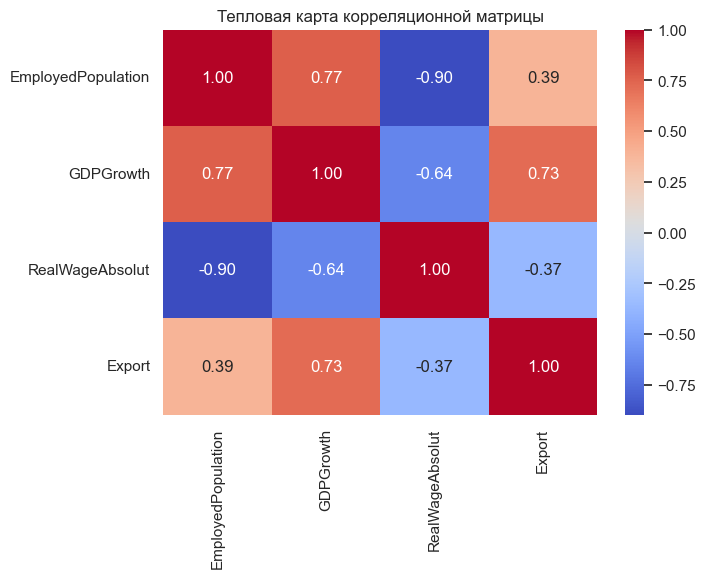

In [16]:
corr_matrix = data[['EmployedPopulation', 'GDPGrowth', 'RealWageAbsolut', 'Export']].corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = data[[ 'GDPGrowth', 'RealWageAbsolut', 'Export']]
#X_sm = sm.add_constant(X)  # Добавляем константу
y = data["EmployedPopulation"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_scaled = sm.add_constant(X_scaled)

In [18]:
#model_sm = sm.OLS(y, X_sm).fit()
model1 = sm.OLS(y, X_scaled).fit()
print("Summary of the Regression Model (statsmodels):")
print(model1.summary())

Summary of the Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:     EmployedPopulation   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     54.00
Date:                Thu, 15 May 2025   Prob (F-statistic):           9.01e-10
Time:                        13:10:11   Log-Likelihood:                 70.712
No. Observations:                  24   AIC:                            -133.4
Df Residuals:                      20   BIC:                            -128.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [19]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = data[[ 'GDPGrowth', 'RealWageAbsolut']]
#X_sm = sm.add_constant(X)  # Добавляем константу
y = data["EmployedPopulation"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_scaled = sm.add_constant(X_scaled)

In [20]:
#model_sm = sm.OLS(y, X_sm).fit()
model2 = sm.OLS(y, X_scaled).fit()
print("Summary of the Regression Model (statsmodels):")
print(model2.summary())

Summary of the Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:     EmployedPopulation   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     68.70
Date:                Thu, 15 May 2025   Prob (F-statistic):           6.11e-10
Time:                        13:10:11   Log-Likelihood:                 68.460
No. Observations:                  24   AIC:                            -130.9
Df Residuals:                      21   BIC:                            -127.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [21]:
data['EmployedPopulation_lag1'] = data['EmployedPopulation'].shift(1)
data = data.dropna()

In [22]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = data[[ 'GDPGrowth', "RealWageAbsolut", 'EmployedPopulation_lag1']]
#X_sm = sm.add_constant(X)  # Добавляем константу
y = data["EmployedPopulation"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_scaled = sm.add_constant(X_scaled)

In [23]:
#model3 = sm.OLS(y, X_sm).fit()
model3 = sm.OLS(y, X_scaled).fit()
print("Summary of the Regression Model (statsmodels):")
print(model3.summary())

Summary of the Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:     EmployedPopulation   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1072.
Date:                Thu, 15 May 2025   Prob (F-statistic):           2.30e-21
Time:                        13:10:11   Log-Likelihood:                 101.26
No. Observations:                  23   AIC:                            -194.5
Df Residuals:                      19   BIC:                            -190.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = data[[ 'GDPGrowth', "RealWageAbsolut", 'EmployedPopulation_lag1']]
X_sm = sm.add_constant(X)  # Добавляем константу
y = data["EmployedPopulation"]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# X_scaled = sm.add_constant(X_scaled)

In [25]:
#model3 = sm.OLS(y, X_sm).fit()
model4 = sm.OLS(y, X_sm).fit()
print("Summary of the Regression Model (statsmodels):")
print(model4.summary())

Summary of the Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:     EmployedPopulation   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1072.
Date:                Thu, 15 May 2025   Prob (F-statistic):           2.30e-21
Time:                        13:10:11   Log-Likelihood:                 101.26
No. Observations:                  23   AIC:                            -194.5
Df Residuals:                      19   BIC:                            -190.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [26]:
predictions = model3.predict(X_scaled)
residuals = model3.resid

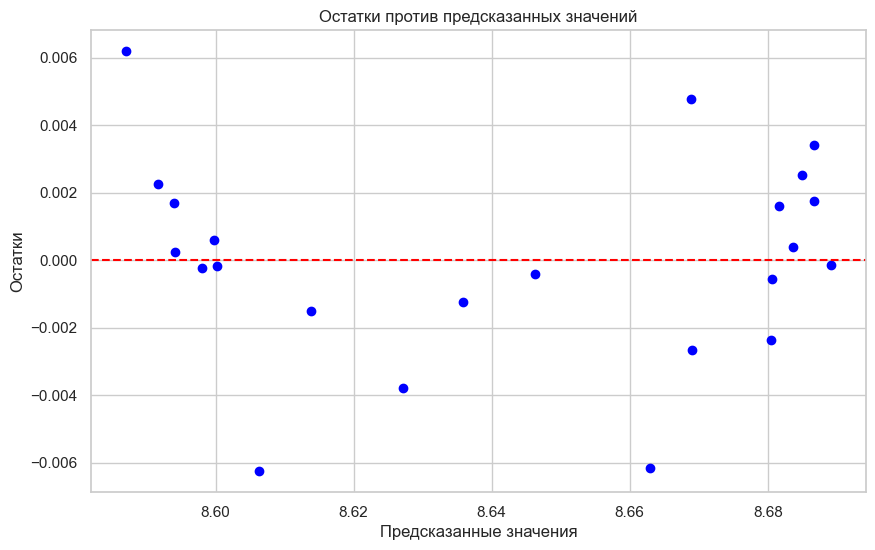

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки против предсказанных значений')
plt.show()

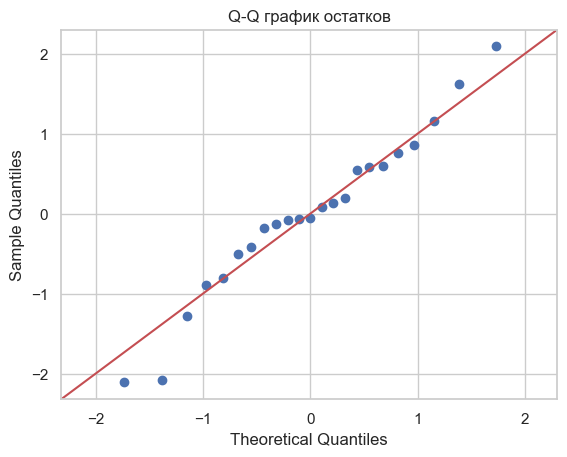

In [28]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q график остатков')
plt.show()

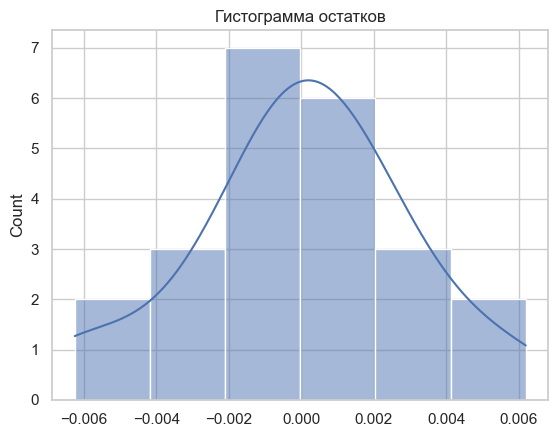

In [29]:
sns.histplot(residuals, kde=True)
plt.title('Гистограмма остатков')
plt.show()

In [30]:
from scipy import stats

print("=== Результаты тестов ===")

jb_test = stats.jarque_bera(residuals)
print(f"Тест Жака-Бера: статистика = {jb_test.statistic:.4f}, p-значение = {jb_test.pvalue:.4f}")

shapiro_test = stats.shapiro(residuals)
print(f"Тест Шапиро-Уилка: статистика = {shapiro_test.statistic:.4f}, p-значение = {shapiro_test.pvalue:.4f}")

=== Результаты тестов ===
Тест Жака-Бера: статистика = 0.2228, p-значение = 0.8946
Тест Шапиро-Уилка: статистика = 0.9715, p-значение = 0.7250


In [31]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

bp_test = het_breuschpagan(residuals, X_scaled)
white_test = het_white(residuals, X_scaled)

# Выводим результаты в столбик
print("=== Результаты тестов гомоскедастичности ===")
print("Тест Бройша-Пагана:")
print(f"  LM Statistic: {bp_test[0]:.4f}")
print(f"  LM p-value:   {bp_test[1]:.4f}")
print(f"  F p-value:    {bp_test[3]:.4f}")
print("\nТест Уайта:")
print(f"  LM Statistic: {white_test[0]:.4f}")
print(f"  LM p-value:   {white_test[1]:.4f}")
print(f"  F p-value:    {white_test[3]:.4f}")

=== Результаты тестов гомоскедастичности ===
Тест Бройша-Пагана:
  LM Statistic: 5.1065
  LM p-value:   0.1642
  F p-value:    0.1800

Тест Уайта:
  LM Statistic: 10.3512
  LM p-value:   0.3228
  F p-value:    0.3800


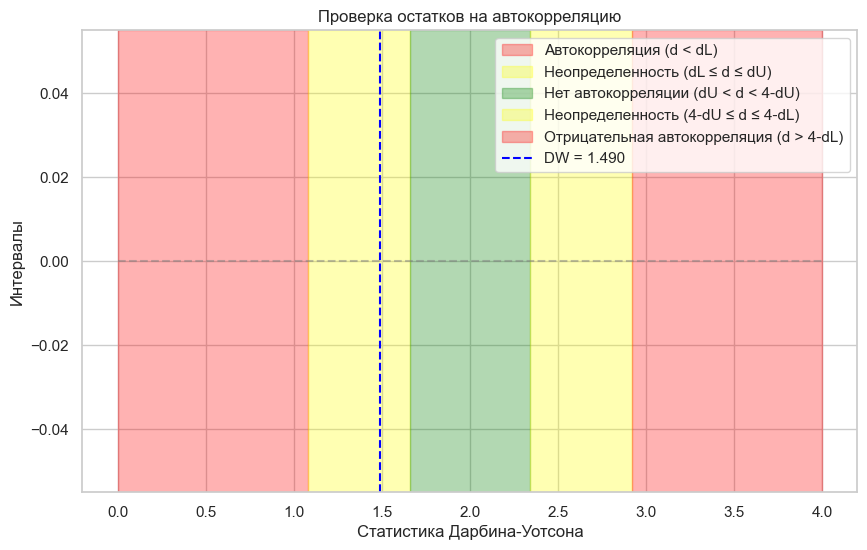

In [32]:
import matplotlib.pyplot as plt

# Значения из таблицы критических значений
n = 23  # Объем выборки
k = 3   # Количество экзогенных переменных
dL = 1.08  # Нижняя граница (примерное значение для n=23, k=3)
dU = 1.66  # Верхняя граница (примерное значение для n=23, k=3)
dw_value = 1.490  # Значение Durbin-Watson из вашей модели

# Создаем график
plt.figure(figsize=(10, 6))
x = [0, 4]
plt.plot(x, [0, 0], color='gray', linestyle='--', alpha=0.5)  # Ось X
plt.axvspan(0, dL, color='red', alpha=0.3, label='Автокорреляция (d < dL)')
plt.axvspan(dL, dU, color='yellow', alpha=0.3, label='Неопределенность (dL ≤ d ≤ dU)')
plt.axvspan(dU, 4-dU, color='green', alpha=0.3, label='Нет автокорреляции (dU < d < 4-dU)')
plt.axvspan(4-dU, 4-dL, color='yellow', alpha=0.3, label='Неопределенность (4-dU ≤ d ≤ 4-dL)')
plt.axvspan(4-dL, 4, color='red', alpha=0.3, label='Отрицательная автокорреляция (d > 4-dL)')

# Отмечаем значение Durbin-Watson
plt.axvline(x=dw_value, color='blue', linestyle='--', label=f'DW = {dw_value:.3f}')

plt.xlabel('Статистика Дарбина-Уотсона')
plt.ylabel('Интервалы')
plt.title('Проверка остатков на автокорреляцию')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_test = acorr_ljungbox(residuals, lags=[1])
print(f"Ljung-Box Test: Statistic = {ljungbox_test['lb_stat'].iloc[0]:.4f}, p-value = {ljungbox_test['lb_pvalue'].iloc[0]:.4f}")

Ljung-Box Test: Statistic = 1.3625, p-value = 0.2431


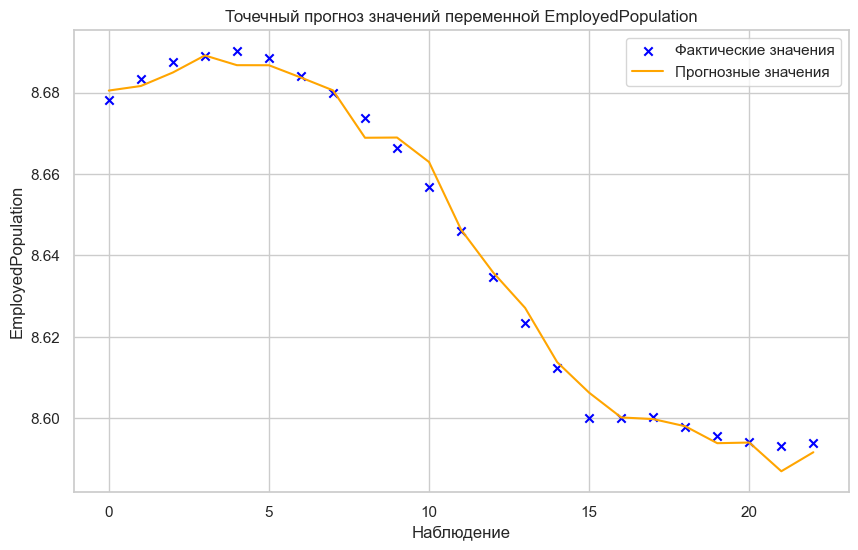

In [34]:
import matplotlib.pyplot as plt

X_pred = data[[ 'GDPGrowth', "RealWageAbsolut", 'EmployedPopulation_lag1']]
X_pred_scaled = scaler.transform(X_pred)
X_pred_scaled = sm.add_constant(X_pred_scaled)

y_pred = model3.predict(X_pred_scaled)
y_true = data["EmployedPopulation"]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_true)), y_true, color='blue', label='Фактические значения', marker='x')
plt.plot(range(len(y_pred)), y_pred, color='orange', label='Прогнозные значения')
plt.title("Точечный прогноз значений переменной EmployedPopulation")
plt.xlabel("Наблюдение")
plt.ylabel("EmployedPopulation")
plt.legend()
plt.grid(True)
plt.show()

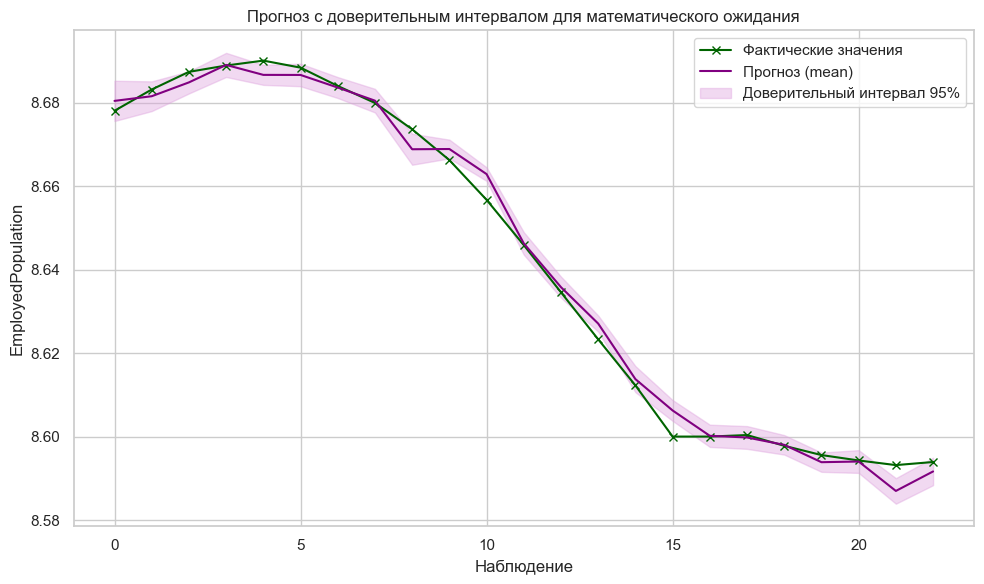

In [35]:
import matplotlib.pyplot as plt

predictions = model3.get_prediction(X_scaled)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% доверительный интервал

# Извлекаем нужные данные
y_true = y
y_pred = summary_frame['mean']
ci_lower = summary_frame['mean_ci_lower']
ci_upper = summary_frame['mean_ci_upper']

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(y_true.values, label='Фактические значения', marker='x', color='darkgreen')
plt.plot(y_pred.values, label='Прогноз (mean)', color='purple')
plt.fill_between(range(len(y_pred)), ci_lower, ci_upper, color='plum', alpha=0.4, label='Доверительный интервал 95%')
plt.title('Прогноз с доверительным интервалом для математического ожидания')
plt.xlabel('Наблюдение')
plt.ylabel('EmployedPopulation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

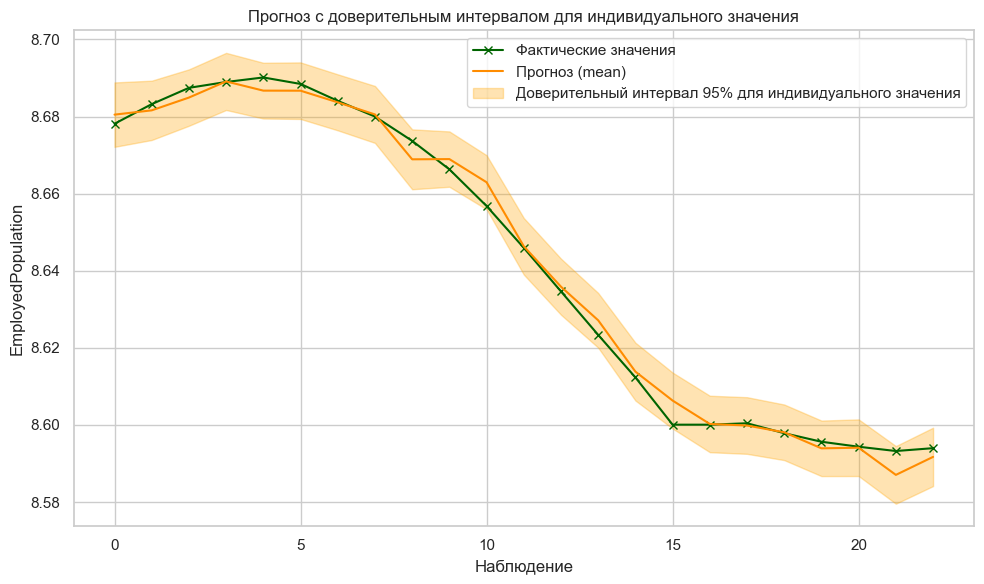

In [36]:
predictions = model3.get_prediction(X_scaled)
summary_frame = predictions.summary_frame(alpha=0.05)

y_true = y
y_pred = summary_frame['mean']
ci_lower = summary_frame['obs_ci_lower']  # доверительный интервал для индивидуального значения
ci_upper = summary_frame['obs_ci_upper']

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(y_true.values, label='Фактические значения', marker='x', color='darkgreen')
plt.plot(y_pred.values, label='Прогноз (mean)', color='darkorange')
plt.fill_between(range(len(y_pred)), ci_lower, ci_upper, color='orange', alpha=0.3, label='Доверительный интервал 95% для индивидуального значения')
plt.title('Прогноз с доверительным интервалом для индивидуального значения')
plt.xlabel('Наблюдение')
plt.ylabel('EmployedPopulation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Расчёт средних значений переменных
Y_mean = data['EmployedPopulation'].mean()
GDP_mean = data['GDPGrowth'].mean()
Wage_mean = data["RealWageAbsolut"].mean()
Lag_mean = data['EmployedPopulation_lag1'].mean()

# Средняя эффективность каждого фактора
AverageEffGDP = Y_mean / GDP_mean
AverageEffWage = Y_mean / Wage_mean
AverageEffLag = Y_mean / Lag_mean

# Вывод результатов
print("Средняя эффективность показателей:")
print(f"• GDPGrowth: {AverageEffGDP:.4f}")
print(f"• RealWageAbsolut: {AverageEffWage:.4f}")
print(f"• EmployedPopulation_lag1: {AverageEffLag:.4f}")

Средняя эффективность показателей:
• GDPGrowth: 0.0833
• RealWageAbsolut: 1.6187
• EmployedPopulation_lag1: 0.9996


In [38]:
print("Предельная эффективность показателей:")
print(model3.params)

Предельная эффективность показателей:
const                      8.642129
GDPGrowth                  0.003466
RealWageAbsolut           -0.009057
EmployedPopulation_lag1    0.027517
dtype: float64


In [39]:
Y_mean = data['EmployedPopulation'].mean()
GDP_mean = data['GDPGrowth'].mean()
Wage_mean = data["RealWageAbsolut"].mean()
Lag_mean = data['EmployedPopulation_lag1'].mean()

b1 = 0.003466
b2 = -0.009057
b3 = 0.027517

el1 = b1 * (GDP_mean / Y_mean)
el2 = b2 * (Wage_mean / Y_mean)
el3 = b3 * (Lag_mean / Y_mean)
el = el1 + el2 + el3

print("Частичные коэффициенты эластичности:")
print(f"GDPGrowth: {el1:.4f}")
print(f"RealWageAbsolut: {el2:.4f}")
print(f"EmployedPopulation_lag1: {el3:.4f}")
print()
print(f"Общая эластичность: {el:.4f}")

Частичные коэффициенты эластичности:
GDPGrowth: 0.0416
RealWageAbsolut: -0.0056
EmployedPopulation_lag1: 0.0275

Общая эластичность: 0.0635


In [40]:
gdp = 0.003466
lag = 0.027517
wage = -0.009057

MRS1 = -(gdp / wage)
MRS2 = -(lag / wage)
MRS3 = -(lag / gdp)

print("Предельная норма замещения:")
print(f"MRS (Gdp - Wage): {MRS1:.4f}")
print(f"MRS (Lag - Wage): {MRS2:.4f}")
print(f"MRS (Lag - Gdp): {MRS3:.4f}")

Предельная норма замещения:
MRS (Gdp - Wage): 0.3827
MRS (Lag - Wage): 3.0382
MRS (Lag - Gdp): -7.9391


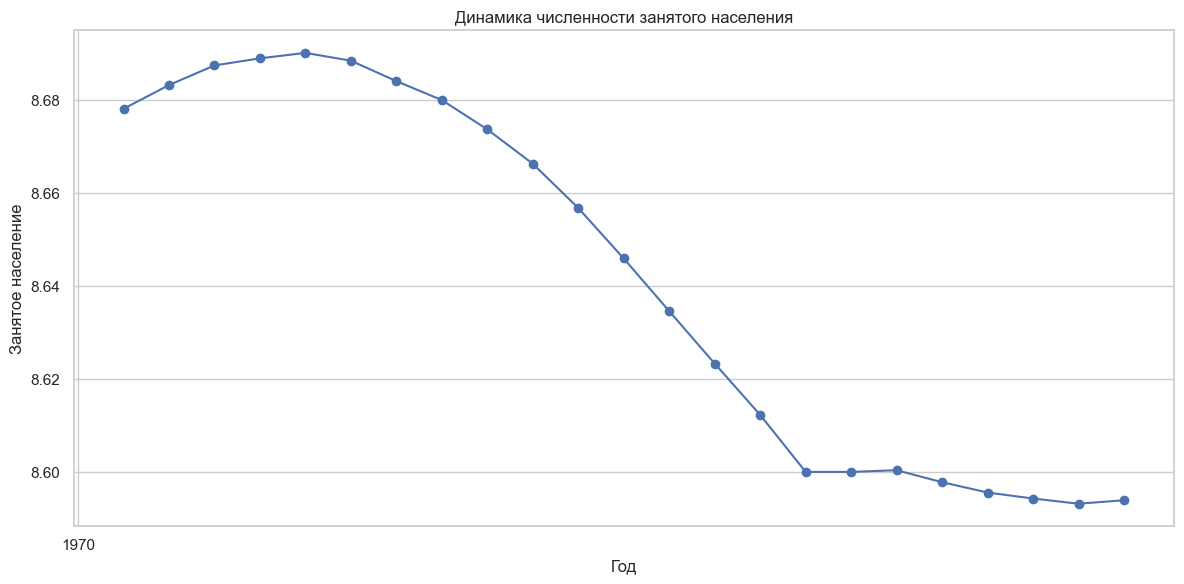

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка или использование уже существующего DataFrame
# df = pd.read_csv('your_data.csv')  # если у тебя CSV-файл

# Убедись, что колонка с датами в формате datetime
data['Year'] = pd.to_datetime(data['Year'])

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['EmployedPopulation'], marker='o', linestyle='-')
plt.title('Динамика численности занятого населения')
plt.xlabel('Год')
plt.ylabel('Занятое население')
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# results — это результат reg = sm.OLS(...).fit()
bg_test = acorr_breusch_godfrey(model3, nlags=7)
print("LM stat:", bg_test[0], "p-value:", bg_test[1])

LM stat: 15.019016329393855 p-value: 0.03575641441673189
